LOADING AND READING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ma_lga_12345.csv")
df.head()

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2


EXPLORATORY DATA ANALYSIS

<Figure size 1152x576 with 0 Axes>

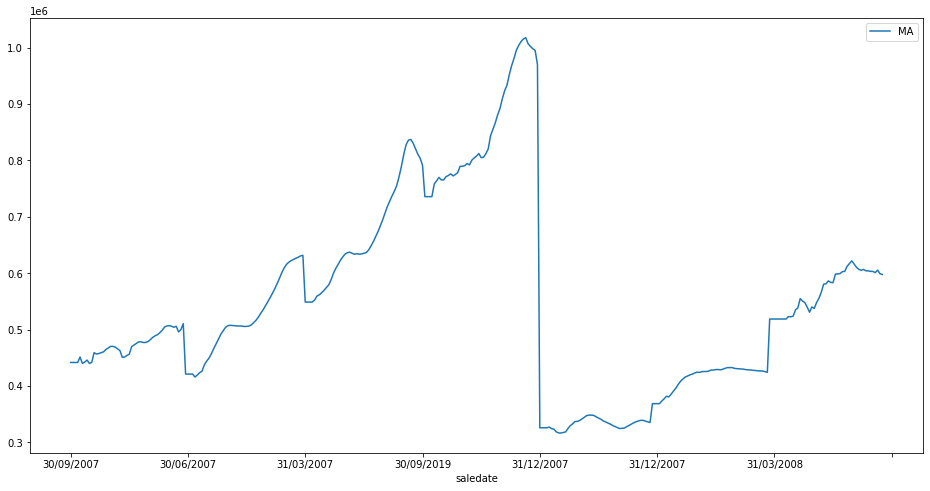

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
df.plot(x="saledate", y="MA", figsize=(16,8))

In [5]:
df["saledate"] = pd.to_datetime(df["saledate"])

In [6]:
df["weekday"] = df["saledate"].dt.day_name()
df["day"] = df["saledate"].dt.day
df["month"] = df["saledate"].dt.month
df["year"] = df["saledate"].dt.year

In [7]:
df

,saledate,MA,type,bedrooms,weekday,day,month,year
0,2007-09-30,441854,house,2,Sunday,30,9,2007
1,2007-12-31,441854,house,2,Monday,31,12,2007
2,2008-03-31,441854,house,2,Monday,31,3,2008
3,2008-06-30,441854,house,2,Monday,30,6,2008
4,2008-09-30,451583,house,2,Tuesday,30,9,2008
...,...,...,...,...,...,...,...,...
342,2018-09-30,603281,unit,3,Sunday,30,9,2018
343,2018-12-31,601167,unit,3,Monday,31,12,2018
344,2019-03-31,605637,unit,3,Sunday,31,3,2019
345,2019-06-30,599339,unit,3,Sunday,30,6,2019


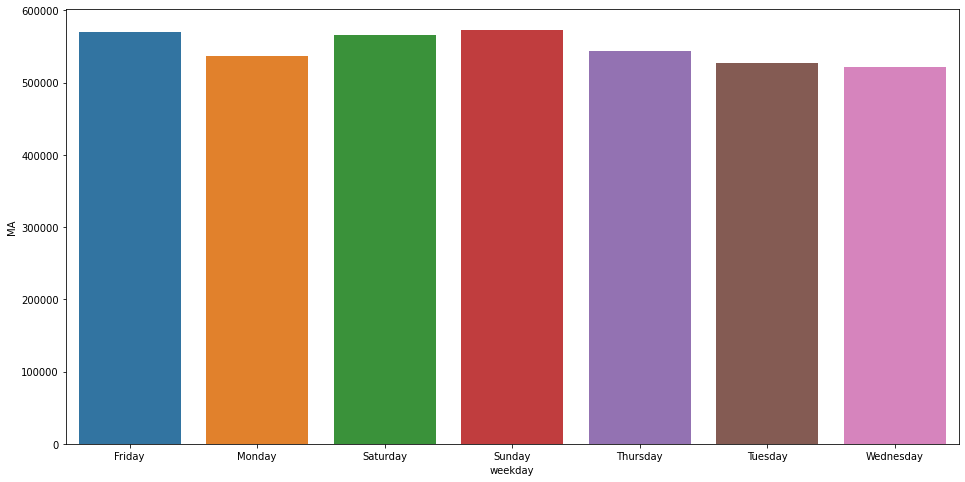

In [8]:
#analyzing which weekday has the highest house price!!
dfweekdayprice = df.groupby("weekday")["MA"].mean().reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt = sns.barplot(x="weekday", y="MA", data=dfweekdayprice)

In [9]:
#analyzing which day has the highest house price!!
dfdayprice = df.groupby("day")["MA"].mean().reset_index()
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(16,8))
px.pie(names="day", values="MA", data_frame=dfdayprice)

<Figure size 1152x576 with 0 Axes>

In [10]:
#analyzing which month has the highest house price!!
dfmonthprice = df.groupby("month")["MA"].mean().reset_index()
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(16,8))
px.pie(names="month", values="MA", data_frame=dfmonthprice)

<Figure size 1152x576 with 0 Axes>

In [11]:
#analyzing which month has the highest house price!!
dfyearprice = df.groupby("year")["MA"].mean().reset_index()
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(16,8))
px.pie(names="year", values="MA", data_frame=dfyearprice)

<Figure size 1152x576 with 0 Axes>

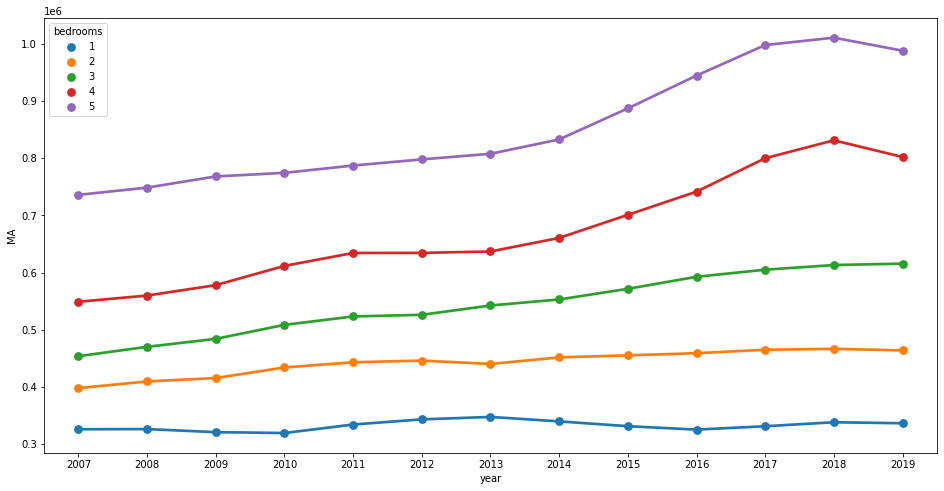

In [12]:
#analyzing which year has the highest house price according to number of rooms!!
dfaccprice = df.groupby(["year", "bedrooms"])["MA"].mean().reset_index()
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(16,8))
sns.pointplot(x="year", y="MA", hue="bedrooms", data=dfaccprice)

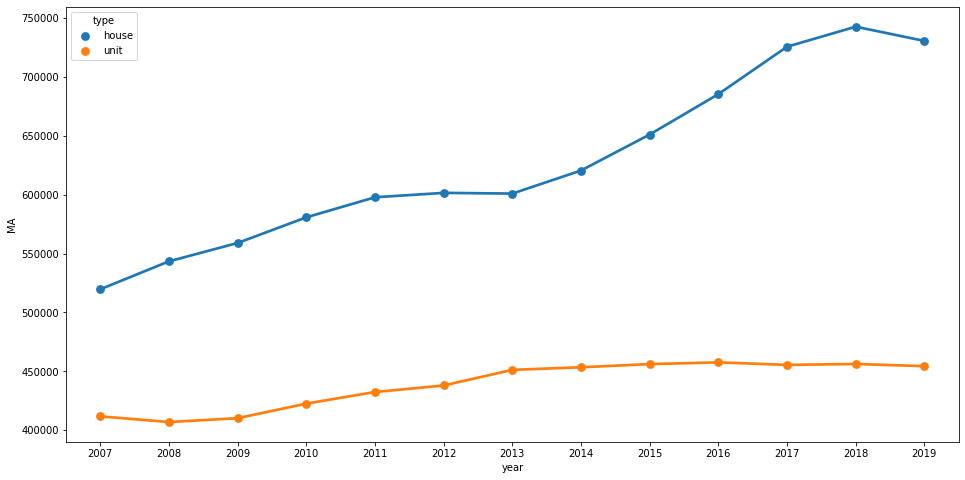

In [13]:
#analyzing which year has the highest house price according to house type!!
dftypeprice = df.groupby(["year", "type"])["MA"].mean().reset_index()
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(16,8))
sns.pointplot(x="year", y="MA", hue="type", data=dftypeprice)

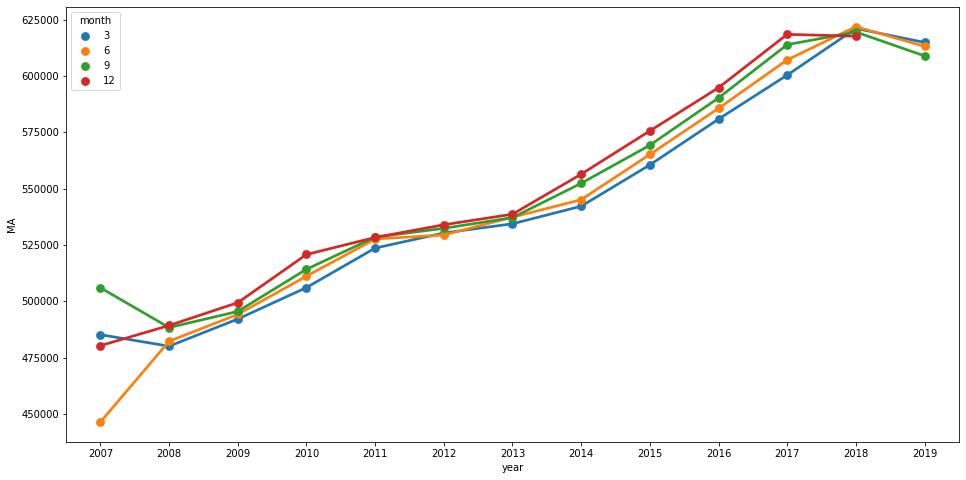

In [14]:
#analyzing which month has the highest house price according to year!!
dfmonprice = df.groupby(["year", "month"])["MA"].mean().reset_index()
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(16,8))
sns.pointplot(x="year", y="MA", hue="month", data=dfmonprice)

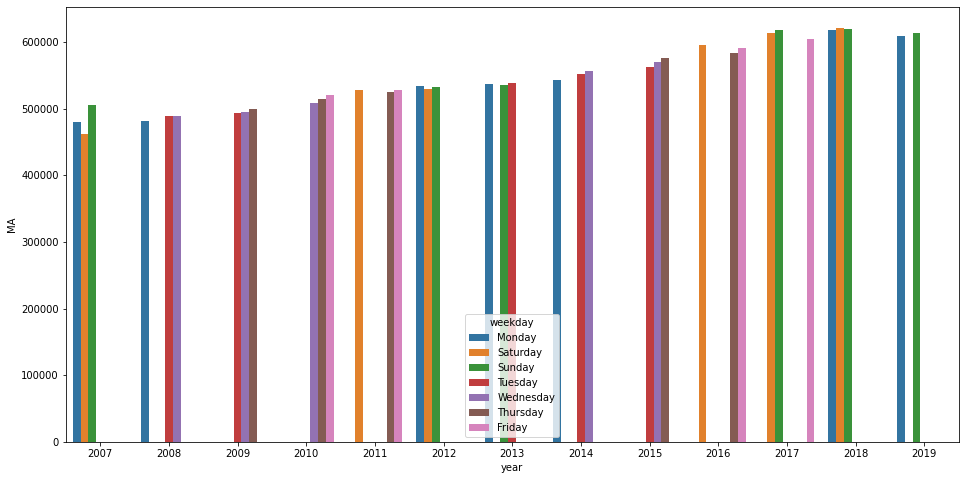

In [15]:
#analyzing which year has the highest house price according to weekday!!
dfweekprice = df.groupby(["year", "weekday"])["MA"].mean().reset_index()
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(16,8))
sns.barplot(x="year", y="MA", hue="weekday", data=dfweekprice)

In [16]:
df

,saledate,MA,type,bedrooms,weekday,day,month,year
0,2007-09-30,441854,house,2,Sunday,30,9,2007
1,2007-12-31,441854,house,2,Monday,31,12,2007
2,2008-03-31,441854,house,2,Monday,31,3,2008
3,2008-06-30,441854,house,2,Monday,30,6,2008
4,2008-09-30,451583,house,2,Tuesday,30,9,2008
...,...,...,...,...,...,...,...,...
342,2018-09-30,603281,unit,3,Sunday,30,9,2018
343,2018-12-31,601167,unit,3,Monday,31,12,2018
344,2019-03-31,605637,unit,3,Sunday,31,3,2019
345,2019-06-30,599339,unit,3,Sunday,30,6,2019


In [18]:
df.pop("weekday")

0       Sunday
1       Monday
2       Monday
3       Monday
4      Tuesday
        ...   
342     Sunday
343     Monday
344     Sunday
345     Sunday
346     Monday
Name: weekday, Length: 347, dtype: object

In [19]:
df.pop("day")

0      30
1      31
2      31
3      30
4      30
       ..
342    30
343    31
344    31
345    30
346    30
Name: day, Length: 347, dtype: int64

In [20]:
df.pop("month")

0       9
1      12
2       3
3       6
4       9
       ..
342     9
343    12
344     3
345     6
346     9
Name: month, Length: 347, dtype: int64

In [21]:
df.pop("saledate")

0     2007-09-30
1     2007-12-31
2     2008-03-31
3     2008-06-30
4     2008-09-30
         ...    
342   2018-09-30
343   2018-12-31
344   2019-03-31
345   2019-06-30
346   2019-09-30
Name: saledate, Length: 347, dtype: datetime64[ns]

In [22]:
df["type"] = df["type"].replace(["house"], 2)
df["type"] = df["type"].replace(["unit"], 1)

In [23]:
df

,MA,type,bedrooms,year
0,441854,2,2,2007
1,441854,2,2,2007
2,441854,2,2,2008
3,441854,2,2,2008
4,451583,2,2,2008
...,...,...,...,...
342,603281,1,3,2018
343,601167,1,3,2018
344,605637,1,3,2019
345,599339,1,3,2019


In [24]:
target = df.pop("MA")

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
pred = lr.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9348470765743427

In [30]:
pred

array([748764.13855906, 262422.15130018, 511263.70445074, 585880.22331439,
       549701.16663333, 748764.13855906, 363082.84001382, 462640.00246347,
       598324.8686206 , 349534.66844364, 549701.16663333, 437750.71185106,
       698985.55733423, 361979.31374984, 399261.89669488, 274866.79660639,
       736319.49325285, 499922.58540851, 860714.59334134, 486323.06086474,
       436595.8326135 , 349534.66844364, 823380.65742271, 611873.04019078,
       587035.10255196, 773602.07619788, 761157.43089168, 860714.59334134,
       560990.93270198, 499973.9383821 , 536101.64208956, 523656.99678336,
       399261.89669488, 848269.94803513, 436595.8326135 , 287311.4419126 ,
       287311.4419126 , 810936.01211651, 437750.71185106, 748764.13855906,
       711430.20264044, 611924.39316437, 424151.18730729, 624369.03847058,
       587035.10255196, 585880.22331439, 885603.88395375, 611873.04019078,
       761208.78386527, 361979.31374984, 610769.51392681, 512418.5836883 ,
       860714.59334134, 4

In [31]:
def predict_property_price():
    housetype = int(input("Enter 2 for house and 1 for unit house type :"))
    bedrooms = int(input("Enter number of bedrooms :"))
    year = int(input("Enter the year you want to sell :"))
    x_demo = pd.DataFrame({"type" : [housetype], "bedrooms" : [bedrooms], "year" : [year]})
    pred = lr.predict(x_demo)
    return "$" + " " + str(round(pred[0]))

In [32]:
predict_property_price()

Enter 2 for house and 1 for unit house type :2
Enter number of bedrooms :4
Enter the year you want to sell :2022


'$ 798543'